In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
df = pd.read_csv(r"D:\Y2 S1\AIML\Project\AIML\dataset\heart attack risk prediction\heart_attack_prediction_dataset.csv")

# Display the first 5 rows of the dataframe
print(df.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [8]:
# Get information about the dataframe, including data types and non-null values
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

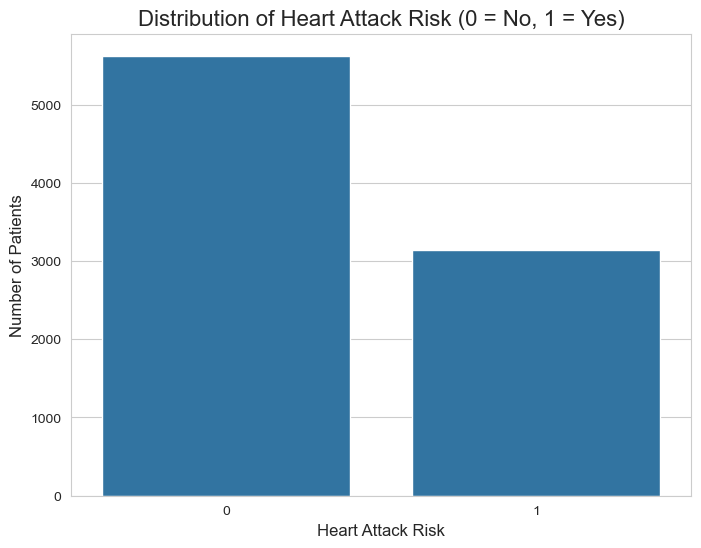

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style for the plots
sns.set_style("whitegrid")

# --- 1. Analyze the Target Variable (Class Imbalance) ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Attack Risk', data=df)
plt.title('Distribution of Heart Attack Risk (0 = No, 1 = Yes)', fontsize=16)
plt.xlabel('Heart Attack Risk', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()

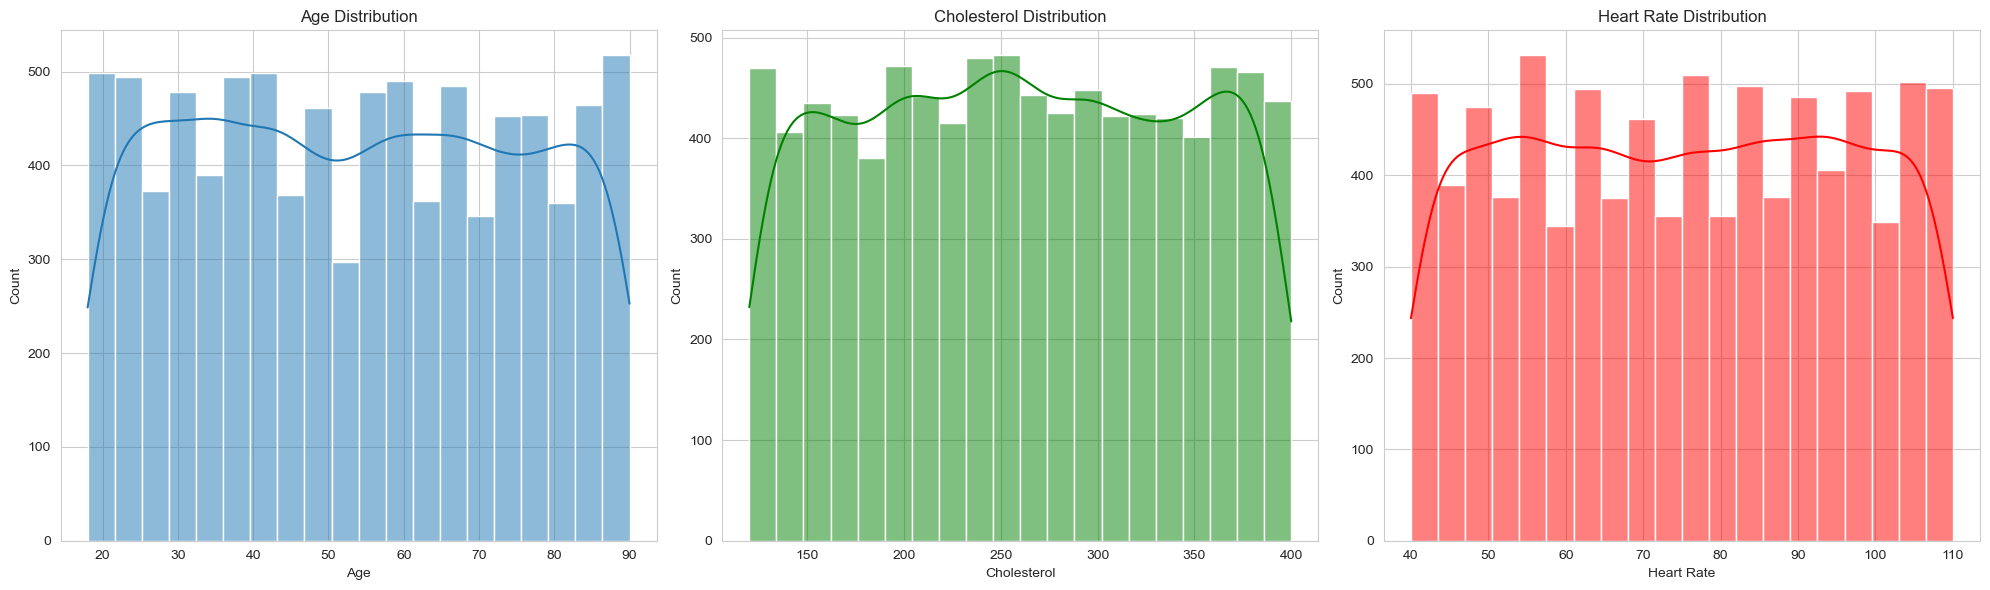

In [10]:
# --- 2. Explore Distributions of Key Numerical Features ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(df['Age'], ax=axes[0], kde=True, bins=20)
axes[0].set_title('Age Distribution')

sns.histplot(df['Cholesterol'], ax=axes[1], kde=True, bins=20, color='green')
axes[1].set_title('Cholesterol Distribution')

sns.histplot(df['Heart Rate'], ax=axes[2], kde=True, bins=20, color='red')
axes[2].set_title('Heart Rate Distribution')
plt.tight_layout()
plt.show()


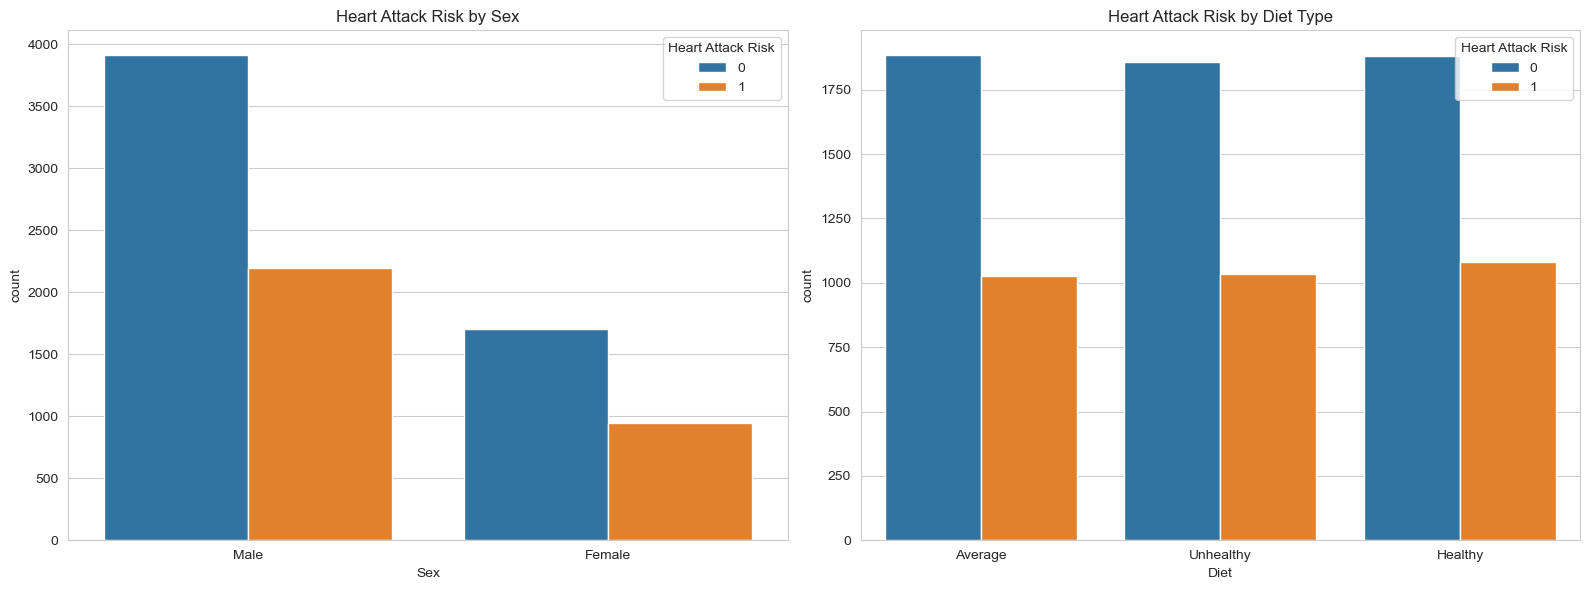

In [9]:
# --- 3. Analyze Key Categorical Features ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='Sex', hue='Heart Attack Risk', data=df, ax=axes[0])
axes[0].set_title('Heart Attack Risk by Sex')

sns.countplot(x='Diet', hue='Heart Attack Risk', data=df, ax=axes[1])
axes[1].set_title('Heart Attack Risk by Diet Type')
plt.tight_layout()
plt.show()

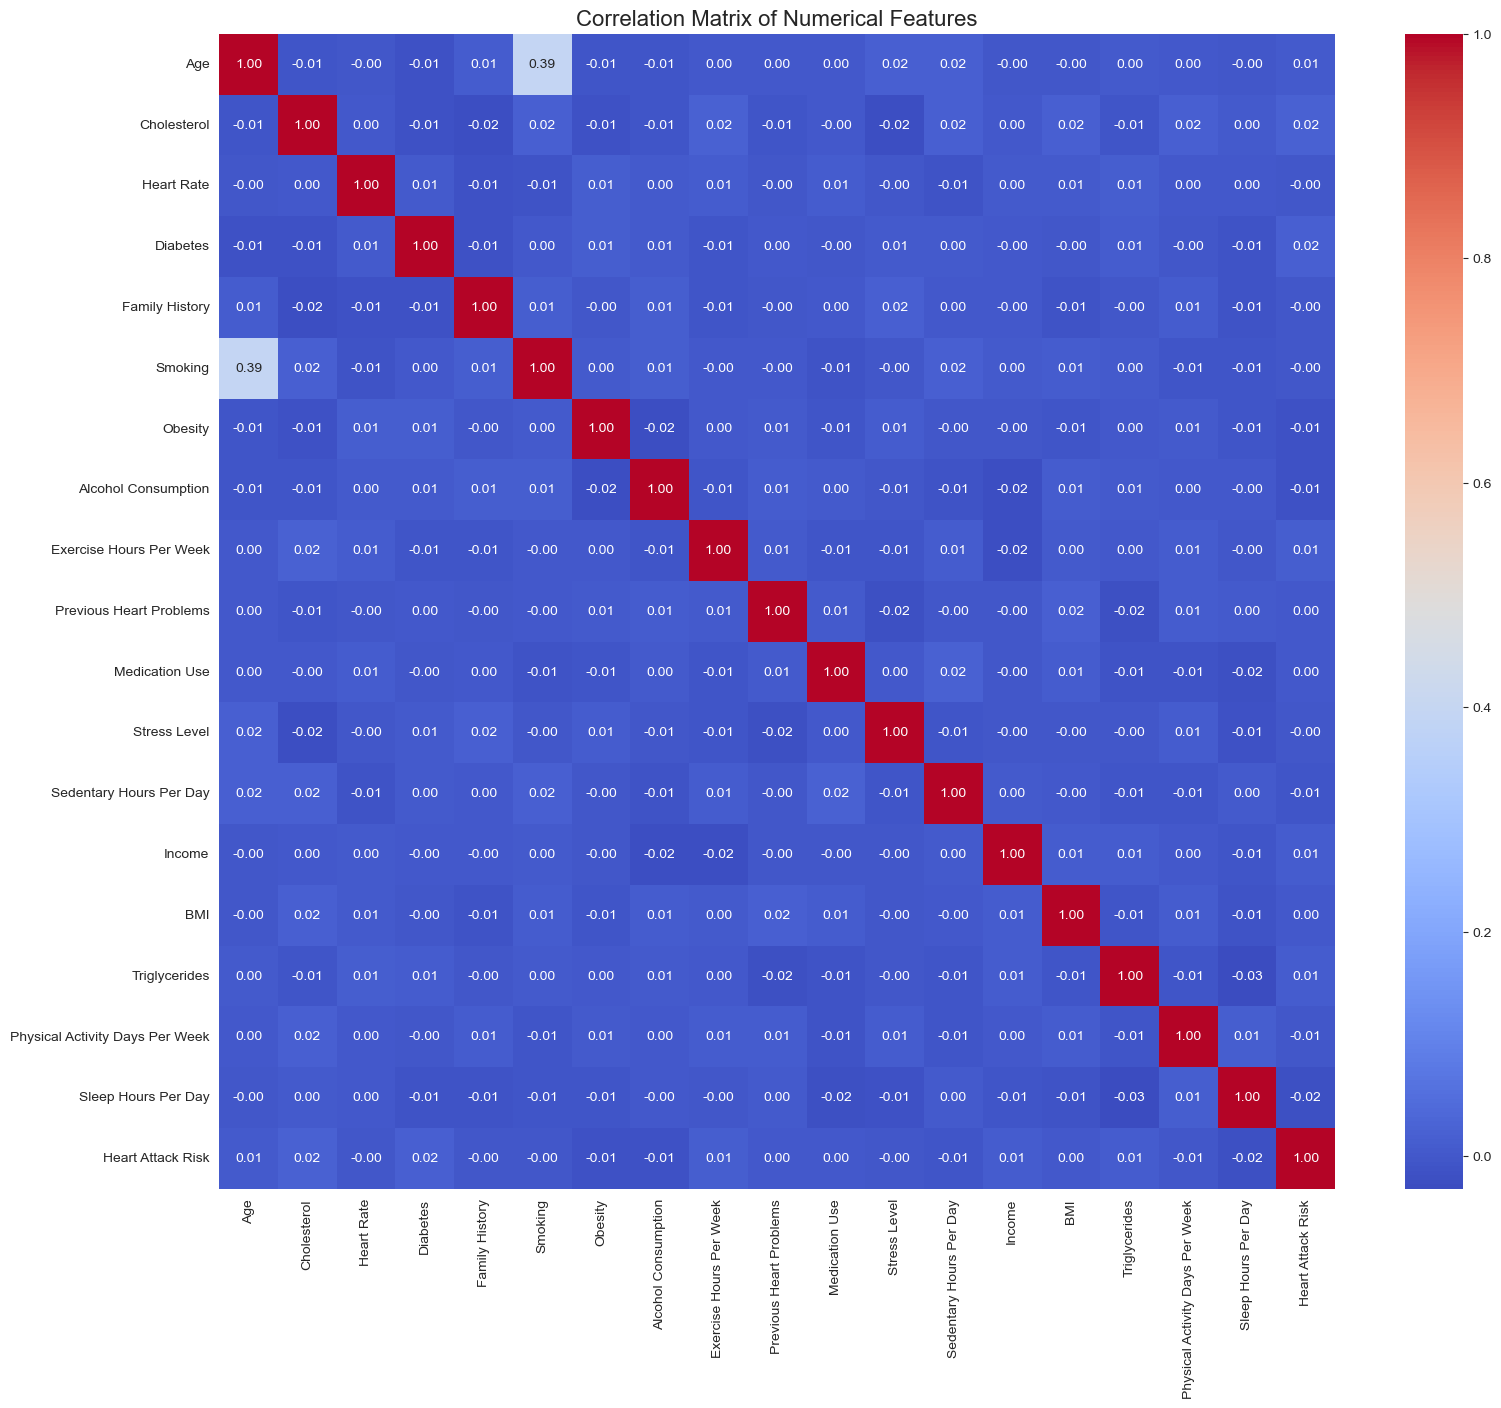

In [11]:
# --- 4. Examine Correlations with a Heatmap ---
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=np.number)

# Create a correlation matrix
plt.figure(figsize=(18, 15))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [12]:
# Display the first 5 rows of the dataframe
print(df.head())

# --- ADD THIS LINE ---
# Print the exact column names to check for typos or spaces
print(df.columns)

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [13]:
# Let's assume you found a leading space in the column name
# df = df.drop(" Patient ID", axis=1)  <-- Notice the space

# Or, if the name was different, you would use that instead
# df = df.drop("PatientID", axis=1)

# --- The rest of your code ---
# Separate features (X) and target (y)
X = df.drop("Heart Attack Risk", axis=1)
y = df["Heart Attack Risk"]

# Now your code should run without the KeyError
print("Successfully dropped the ID column and separated features.")

Successfully dropped the ID column and separated features.


In [14]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Apply the preprocessor to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after SMOTE:
Heart Attack Risk
0    4499
1    4499
Name: count, dtype: int64


In [26]:
# Assuming 'X' is your DataFrame of features
# Split 'Blood Pressure' into two new columns
X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric types
X['Systolic_BP'] = pd.to_numeric(X['Systolic_BP'])
X['Diastolic_BP'] = pd.to_numeric(X['Diastolic_BP'])

# Now, we can drop the original 'Blood Pressure' column
X = X.drop('Blood Pressure', axis=1)

print("Transformed Blood Pressure columns:")
print(X[['Systolic_BP', 'Diastolic_BP']].head())

Transformed Blood Pressure columns:
   Systolic_BP  Diastolic_BP
0          158            88
1          165            93
2          174            99
3          163           100
4           91            88


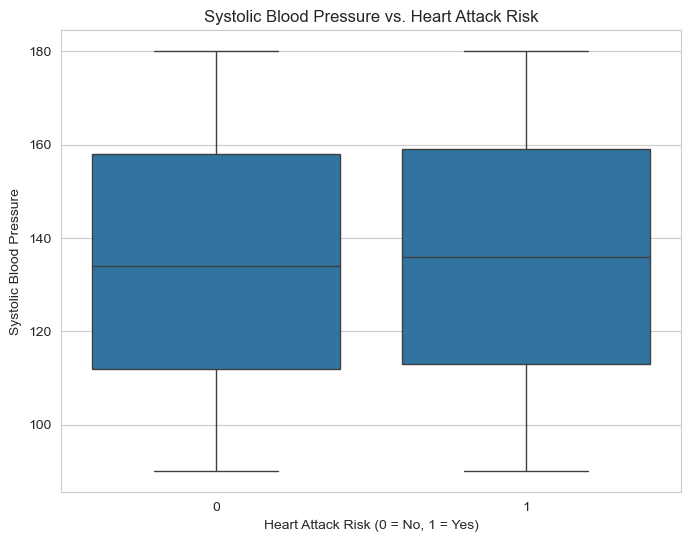

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# (Assuming you have already run the code to create the 'Systolic_BP' column in X)
plt.figure(figsize=(8, 6))

# --- FIX 2: Join the correct 'X' (DataFrame) and 'y' (Series) ---
sns.boxplot(x='Heart Attack Risk', y='Systolic_BP', data=X.join(y))

plt.title('Systolic Blood Pressure vs. Heart Attack Risk')
plt.xlabel('Heart Attack Risk (0 = No, 1 = Yes)')
plt.ylabel('Systolic Blood Pressure')
plt.show()

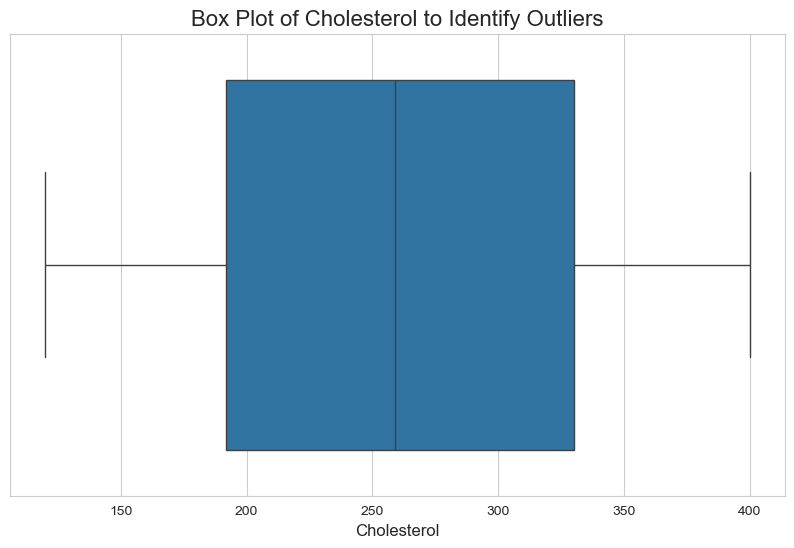

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Visualize Outliers with a Box Plot ---
# This plot visually confirms the presence of outliers (the dots outside the main whiskers).
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Cholesterol'])
plt.title('Box Plot of Cholesterol to Identify Outliers', fontsize=16)
plt.xlabel('Cholesterol', fontsize=12)
plt.show()


In [34]:
# --- 2. Calculate IQR to Programmatically Find Outliers ---
# Choose the column to check for outliers
column_to_check = 'Cholesterol'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column_to_check].quantile(0.25)
Q3 = df[column_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to find rows containing outliers
outliers = df[(df[column_to_check] < lower_bound) | (df[column_to_check] > upper_bound)]

# Display the findings
print(f"--- Outliers in '{column_to_check}' using the IQR method ---")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Bound for Outliers: {lower_bound:.2f}")
print(f"Upper Bound for Outliers: {upper_bound:.2f}")
print(f"\nNumber of outliers found: {len(outliers)}")
print("\nFirst 5 Outlier Rows:")
print(outliers.head())

--- Outliers in 'Cholesterol' using the IQR method ---
Interquartile Range (IQR): 138.0
Lower Bound for Outliers: -15.00
Upper Bound for Outliers: 537.00

Number of outliers found: 0

First 5 Outlier Rows:
Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]


In [19]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=np.number).columns

print(f"Categorical Features: {list(categorical_features)}")
print(f"Numerical Features: {list(numerical_features)}")

# We will use OneHotEncoder for the categorical features
# This should be done within a ColumnTransformer as shown in the next step

Categorical Features: ['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']
Numerical Features: ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic_BP', 'Diastolic_BP']


In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a preprocessor object using ColumnTransformer
# This combines the encoding and scaling steps cleanly
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# --- STEP 1: Load Data ---
df = pd.read_csv(r"D:\Y2 S1\AIML\Project\AIML\dataset\heart attack risk prediction\heart_attack_prediction_dataset.csv")

# --- STEP 2: Separate Features (X) and Target (y) ---
X = df.drop("Heart Attack Risk", axis=1)
y = df["Heart Attack Risk"]

# --- STEP 3: Drop the ID Column (THE CRITICAL FIX) ---
# This MUST be done before any other processing. Use the correct name if it has spaces.
X = X.drop("Patient ID", axis=1)


In [29]:
# --- STEP 4: Transform 'Blood Pressure' Column ---
# This is done on the entire X DataFrame before splitting.
X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True)
X['Systolic_BP'] = pd.to_numeric(X['Systolic_BP'])
X['Diastolic_BP'] = pd.to_numeric(X['Diastolic_BP'])
X = X.drop('Blood Pressure', axis=1)

In [30]:
# --- STEP 5: Define Categorical and Numerical Features ---
# Now that the ID and original Blood Pressure columns are gone, this will be correct.
categorical_features = ['Sex', 'Diet', 'Continent', 'Hemisphere', 'Country'] # Added 'Country' back
numerical_features = [col for col in X.columns if col not in categorical_features]

# --- STEP 6: Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# --- STEP 7: Create and Apply the Preprocessor ---
# This part of your code was correct.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Fit on training data
X_train_processed = preprocessor.fit_transform(X_train)
# Transform test data
X_test_processed = preprocessor.transform(X_test)

In [32]:

# --- STEP 8: Apply SMOTE to the Training Data ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("Shape of preprocessed training data:", X_train_resampled.shape)
print("Shape of preprocessed testing data:", X_test_processed.shape)
print("\nPreprocessing was successful and data is ready for model training!")

Shape of preprocessed training data: (8998, 53)
Shape of preprocessed testing data: (1753, 53)

Preprocessing was successful and data is ready for model training!


C:\Users\nisal\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\nisal\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\nisal\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nisal\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [37]:
from sklearn.linear_model import LogisticRegression

# 1. Initialize the model
model = LogisticRegression(random_state=42)

# 2. Train the model on the balanced training data
model.fit(X_train_resampled, y_train_resampled)

print("Model training is complete!")

Model training is complete!


In [38]:
# Use the trained model to make predictions on the processed test data
y_pred = model.predict(X_test_processed)

print("Predictions have been made on the test data.")

Predictions have been made on the test data.


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results in a clear format
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


--- Model Performance Metrics ---
Accuracy: 0.51
Precision: 0.36
Recall: 0.45
F1 Score: 0.40


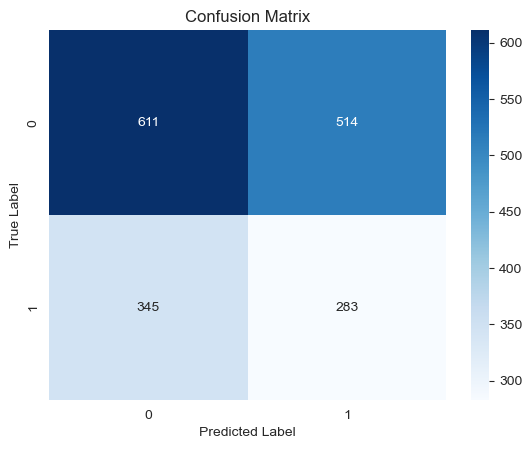

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

--- Training Support Vector Machine (SVM) Model ---
SVM Model training complete!

--- SVM Model Performance ---
Accuracy: 0.54
Precision: 0.33
Recall: 0.27
F1 Score: 0.30


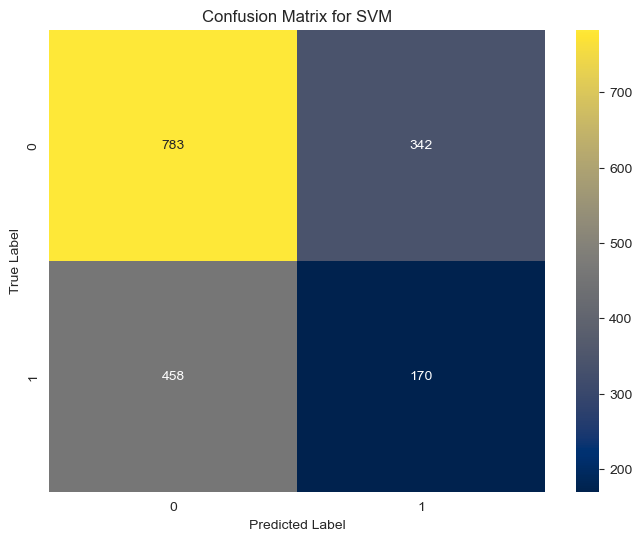

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- 1. Initialize and Train the SVM Model ---
print("--- Training Support Vector Machine (SVM) Model ---")
svm_model = SVC(random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)
print("SVM Model training complete!")

# --- 2. Make Predictions ---
y_pred_svm = svm_model.predict(X_test_processed)

# --- 3. Evaluate the SVM Model ---
print("\n--- SVM Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm):.2f}")

# --- 4. Display Confusion Matrix for SVM ---
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='cividis')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- Training K-Nearest Neighbors (KNN) Model ---
KNN Model training complete!

--- KNN Model Performance ---
Accuracy: 0.46
Precision: 0.35
Recall: 0.57
F1 Score: 0.43


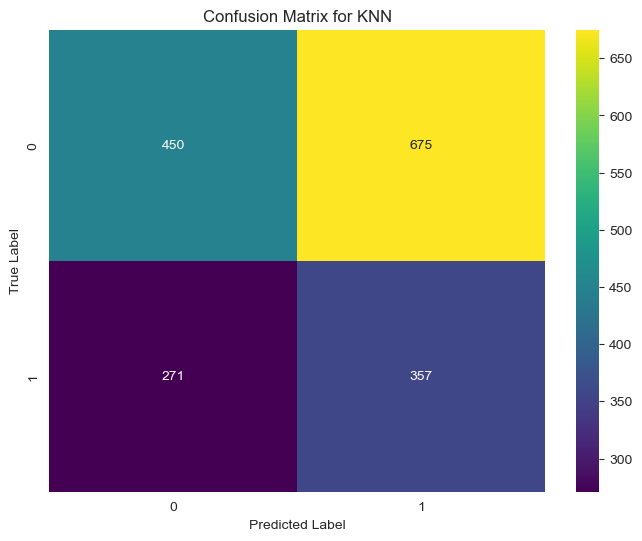

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# --- 1. Initialize and Train the KNN Model ---
print("\n--- Training K-Nearest Neighbors (KNN) Model ---")
knn_model = KNeighborsClassifier(n_neighbors=5) # n_neighbors=5 is a common starting point
knn_model.fit(X_train_resampled, y_train_resampled)
print("KNN Model training complete!")

# --- 2. Make Predictions ---
y_pred_knn = knn_model.predict(X_test_processed)

# --- 3. Evaluate the KNN Model ---
print("\n--- KNN Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.2f}")

# --- 4. Display Confusion Matrix for KNN ---
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()